## 1. Import the libraries and prepare dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('wine.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Standardize dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 2. Apply PCA to reduce dimensions

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca_train = pca.fit_transform(x_train)
x_pca_test = pca.transform(x_test)

In [9]:
# Singular values selected of "S" matrix in U * S * V^T
print('Singular values: ', pca.singular_values_, '\n')
print('Covariance values:\n', pca.explained_variance_, '\n')
print('Covariance matrix:\n', pca.components_, '\n')

Singular values:  [26.09369    18.88432045] 

Covariance values:
 [4.82894083 2.52920254] 

Covariance matrix:
 [[ 0.12959991 -0.24464064 -0.01018912 -0.24051579  0.12649451  0.38944115
   0.42757808 -0.30505669  0.30775255 -0.11027186  0.30710508  0.37636185
   0.2811085 ]
 [-0.49807323 -0.23168482 -0.31496874  0.02321825 -0.25841951 -0.1006849
  -0.02097952 -0.0399057  -0.06746036 -0.53087111  0.27161729  0.16071181
  -0.36547344]] 



## 3. Training the Logistic Regression model on the Training set

In [11]:
from sklearn.linear_model import LogisticRegression

model_pca = LogisticRegression(random_state=0)
model_pca.fit(x_pca_train, y_train)

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

## 4a. Making the Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

def predict(y_pred, subtitle):
    cm = confusion_matrix(y_test, y_pred)
    print(f'Accuracy score ({subtitle}) : ', accuracy_score(y_test, y_pred))
    print(pd.DataFrame(cm), '\n')

predict(model_pca.predict(x_pca_test), 'w PCA')
predict(model.predict(x_test), 'w/o PCA')

Accuracy score (w PCA) :  0.9722222222222222
    0   1  2
0  14   0  0
1   1  15  0
2   0   0  6 

Accuracy score (w/o PCA) :  1.0
    0   1  2
0  14   0  0
1   0  16  0
2   0   0  6 



## 5b. Visualising the results (PCA)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


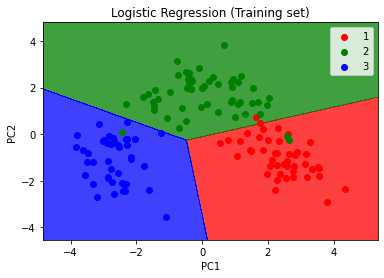

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


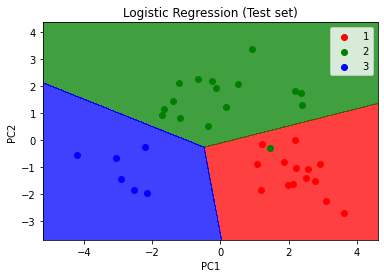

In [23]:
from matplotlib.colors import ListedColormap

def display_graph(x_set, y_set, set_type):
    x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

    plt.contourf(x1, x2, model_pca.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

    plt.title(f'Logistic Regression ({set_type})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()
    
display_graph(x_pca_train, y_train, 'Training set')
display_graph(x_pca_test, y_test, 'Test set')
